# RANDOM FOREST

1. Cargue el módulo de Random Forest de sklearn y cargue el dataset credit.csv  como un dataframe de pandas. Convierta las variables categoricas y la columna default a varaibles dummies

In [3]:

from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

credit=pd.read_csv('/Users/jorgebohl/Desktop/Martinexsa/Proyectos/Cursos/Bantrab/Data Mining Labs/credit.csv')

credit[['CB1_200','CB0','CBmayor200','CBunknown']] = pd.get_dummies(credit["checking_balance"])
credit[['CHcritical','CHgood','CHperfect','CHpoor','CHverygood']] = pd.get_dummies(credit["credit_history"])
credit[['SB100_500','SB500_1000','SBmenor100','SBmayor1000','SBunkown']] = pd.get_dummies(credit["savings_balance"])
credit[['ED1_4','ED4_7','EDmenor1','EDmayor7',"EDunemployed"]] = pd.get_dummies(credit["employment_duration"])
credit[["Hother","Hown","Hrent"]] = pd.get_dummies(credit["housing"])
credit[["Jmanagement","Jskilled","Junemployed","Junskilled"]] = pd.get_dummies(credit["job"])
credit[["Pno","Pyes"]] = pd.get_dummies(credit["phone"])
credit["y"]=np.where(credit["default"]=="no",0,1)


2. Divida la data en training y test con el 80% de la data en training y ponerle random_state



In [4]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
import seaborn as sns


x_credit=credit.drop(['checking_balance','credit_history','purpose','savings_balance','employment_duration',
                  'other_credit','housing','job','phone','default',"y"], axis=1)
y_credit=credit["y"]

x_train,x_test,y_train,y_test=train_test_split(x_credit,y_credit,train_size=0.8,random_state=14)



3. Entrene un random forest. Para entrenar el modelo utilice los parametros n_estimators = 100, max_depth = 5, min_samples_leaf = 20 e importance = TRUE criterio = 'entropy', max_features='sqrt'
 
Luego utilice la funcion plot para entender como se reduce el error cuando se va aumentano la cantidad de arboles

In [5]:
rf_model=RandomForestClassifier(n_estimators=100
                                ,max_depth=5
                                ,min_samples_leaf=20
                                ,criterion='entropy'
                                ,max_features='sqrt'
                                ,random_state=14)

rf_model.fit(x_train,y_train)
rf_model.score(x_train,y_train)

0.75125

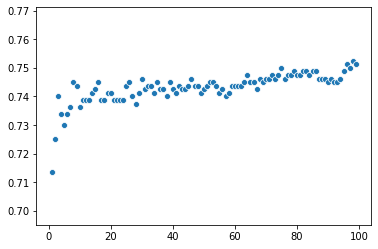

In [6]:
ntree=[]
acc=[]

for i in range(1,100):
    prueba=RandomForestClassifier(n_estimators=i,max_depth=5,min_samples_leaf=20,criterion='entropy',max_features='sqrt',random_state=14)
    prueba.fit(x_train,y_train)
    ntree.append(i)
    acc.append(prueba.score(x_train,y_train))
    
sns.scatterplot(x=ntree,y=acc)

4. Obtenga los votos de los arboles, grafique la importanca de las variables y obtenga la matriz de confusion, precision y recall para el train set.# Además, grafique
la curva ROC y encuentre el área debajo de la curva ROC para el train set.



In [7]:

for x,tree in enumerate(rf_model.estimators_):
    print(x,":  ",tree.predict(np.array(x_train.iloc[0]).reshape(1,-1)))

0 :   [0.]
1 :   [0.]
2 :   [0.]
3 :   [0.]
4 :   [0.]
5 :   [0.]
6 :   [0.]
7 :   [1.]
8 :   [0.]
9 :   [0.]
10 :   [0.]
11 :   [1.]
12 :   [1.]
13 :   [0.]
14 :   [0.]
15 :   [0.]
16 :   [0.]
17 :   [0.]
18 :   [0.]
19 :   [0.]
20 :   [0.]
21 :   [0.]
22 :   [0.]
23 :   [1.]
24 :   [0.]
25 :   [0.]
26 :   [0.]
27 :   [0.]
28 :   [0.]
29 :   [0.]
30 :   [0.]
31 :   [0.]
32 :   [0.]
33 :   [0.]
34 :   [0.]
35 :   [0.]
36 :   [0.]
37 :   [0.]
38 :   [0.]
39 :   [0.]
40 :   [0.]
41 :   [1.]
42 :   [0.]
43 :   [0.]
44 :   [0.]
45 :   [0.]
46 :   [0.]
47 :   [0.]
48 :   [0.]
49 :   [0.]
50 :   [0.]
51 :   [0.]
52 :   [1.]
53 :   [0.]
54 :   [0.]
55 :   [1.]
56 :   [0.]
57 :   [0.]
58 :   [0.]
59 :   [0.]
60 :   [0.]
61 :   [0.]
62 :   [0.]
63 :   [0.]
64 :   [0.]
65 :   [0.]
66 :   [0.]
67 :   [0.]
68 :   [0.]
69 :   [0.]
70 :   [0.]
71 :   [0.]
72 :   [0.]
73 :   [0.]
74 :   [0.]
75 :   [0.]
76 :   [0.]
77 :   [0.]
78 :   [0.]
79 :   [0.]
80 :   [0.]
81 :   [0.]
82 :   [0.]
83 :   [1.]
84

In [8]:
rf_model.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                        max_features='sqrt', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=20, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=59886187, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                        max_features='sqrt', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=20, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1812018520, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                        max_features='sqrt', max_leaf_nodes=None,
                 

In [9]:
tree.predict(np.array(x_train.iloc[1]).reshape(1,-1))

array([0.])

In [40]:
np.array(x_train)

array([[   21,  2353,     1, ...,     0,     1,     0],
       [    9,  1199,     4, ...,     0,     0,     1],
       [   48, 10961,     1, ...,     0,     0,     1],
       ...,
       [   14,  8978,     1, ...,     0,     0,     1],
       [   10,  3949,     1, ...,     1,     1,     0],
       [   12,   640,     4, ...,     1,     1,     0]])

In [10]:
x_col = x_train.columns

col=[]
fi=[]

for x,i in enumerate(rf_model.feature_importances_):
    col.append(x_col[x])
    fi.append(i)

list    

feature_imp = pd.DataFrame()
feature_imp['variable'] = col
feature_imp['feature_importance'] = fi
feature_imp=feature_imp.sort_values('feature_importance',ascending=False)
feature_imp

variable  feature_importance
10             CBunknown            0.229658
1                 amount            0.122239
0   months_loan_duration            0.121149
8                    CB0            0.117004
4                    age            0.080932
11            CHcritical            0.060604
18            SBmenor100            0.039568
7                CB1_200            0.026238
2      percent_of_income            0.025381
27                  Hown            0.016514
28                 Hrent            0.016187
3     years_at_residence            0.015873
15            CHverygood            0.011668
30              Jskilled            0.009758
12                CHgood            0.009468
24              EDmayor7            0.008795
34                  Pyes            0.008673
20              SBunkown            0.008592
22                 ED4_7            0.007639
29           Jmanagement            0.007608
21                 ED1_4            0.007148
33                   Pno            0.006955
23              EDmenor1            0.006485
26                Hother            0.006407
5   existing_loans_count            0.005825
19           SBmayor1000            0.005598
32            Junskilled            0.004934
17            SB500_1000            0.004707
6             dependents            0.003731
16             SB100_500            0.001304
9             CBmayor200            0.001296
14                CHpoor            0.001097
13             CHperfect            0.000964
31           Junemployed            0.000000
25          EDunemployed            0.000000

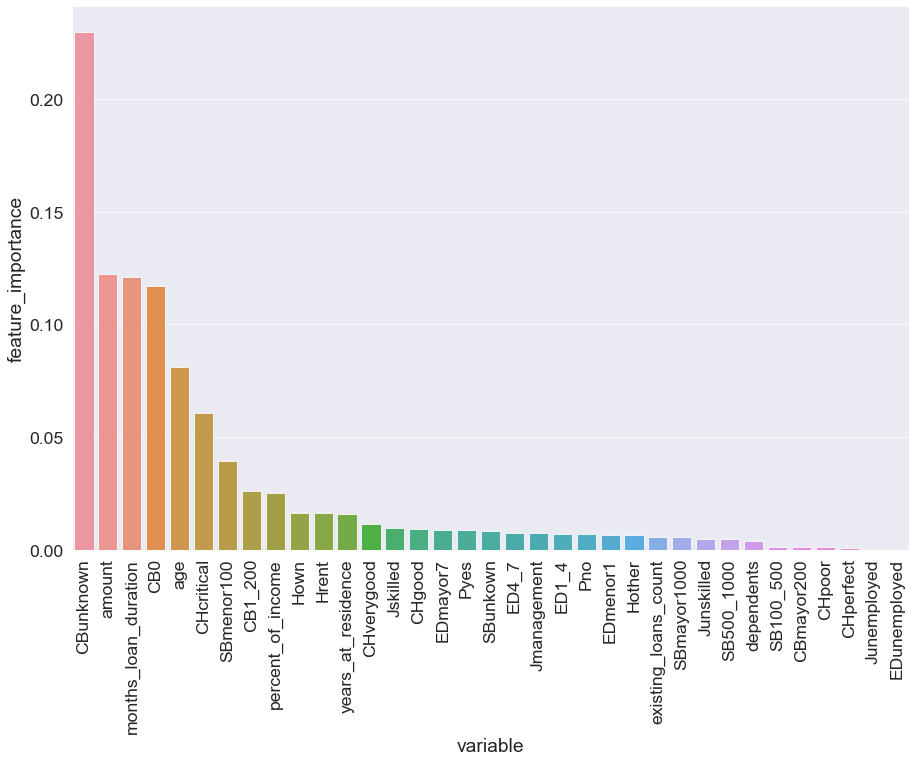

In [11]:
sns.set(rc={'figure.figsize':(15,10)})
sns.set_context("paper", font_scale=2)
g = sns.barplot(x=feature_imp['variable'],y=feature_imp['feature_importance'])
g = g.set_xticklabels(g.get_xticklabels(), rotation=90)



In [12]:

cm=confusion_matrix(y_true=y_train,y_pred=round(pd.Series(rf_model.predict(x_train)),0))

cm

array([[555,  10],
       [189,  46]])

AUC: 0.830


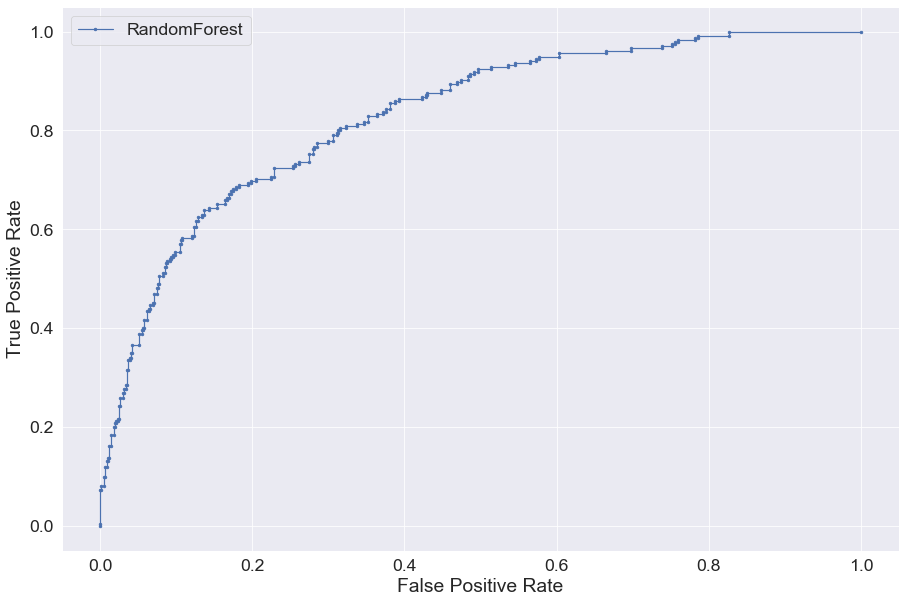

In [14]:
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score,roc_curve

auc = roc_auc_score(y_train, rf_model.predict_proba(x_train)[:,1])
print('AUC: %.3f' % auc)

fpr, tpr, _ = roc_curve(y_train,rf_model.predict_proba(x_train)[:,1])
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.', label='RandomForest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

5. Prediga el test set y obtenga la matriz de confusion, precision y recall. Además, grafique
la curva ROC y encuentre el área debajo de la curva ROC para el test set.

¿Por qué le va mal cuando predice default = yes?

¿Tiene overfit su data?

In [15]:
from sklearn.metrics import precision_recall_fscore_support
cm=confusion_matrix(y_true=y_test,y_pred=round(pd.Series(rf_model.predict(x_test)),0))

cm

array([[132,   3],
       [ 59,   6]])

In [16]:
precision_recall_fscore_support(y_true=y_test,y_pred=round(pd.Series(rf_model.predict(x_test)),0))

(array([0.69109948, 0.66666667]),
 array([0.97777778, 0.09230769]),
 array([0.80981595, 0.16216216]),
 array([135,  65]))

AUC: 0.745


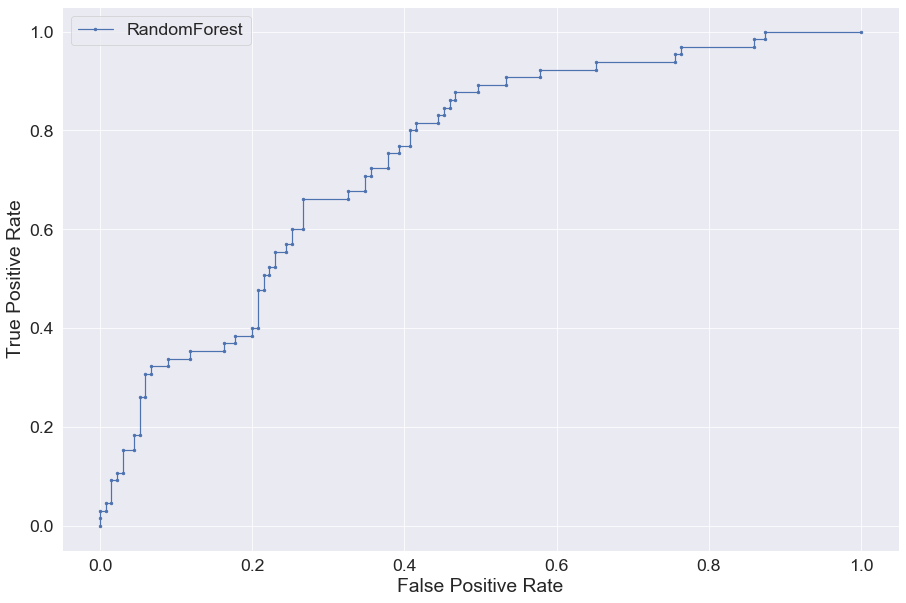

In [17]:
auc = roc_auc_score(y_test, rf_model.predict_proba(x_test)[:,1])
print('AUC: %.3f' % auc)

fpr, tpr, _ = roc_curve(y_test,rf_model.predict_proba(x_test)[:,1])
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.', label='RandomForest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

6. Balancee el dataset utilizando oversample y realice los pasos en los incisos anteriores. 

Compruebe que su modelo no tenga overfit

In [33]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

num_y=credit["default"].value_counts()

max_num=max(num_y)

max_class=num_y[num_y==max(num_y)].index[0]

oversamp=credit[credit["default"]!=max_class].sample(max_num,random_state=10,replace=True)

credit_balanced=pd.concat([oversamp,credit[credit["default"]==max_class]],axis=0)

print(credit_balanced["default"].value_counts())

x_balanced=credit_balanced.drop(['checking_balance','credit_history','purpose','savings_balance','employment_duration',
                  'other_credit','housing','job','phone','default',"y"], axis=1)
y_balanced=credit_balanced["y"]

x_trainB,x_testB,y_trainB,y_testB = train_test_split(x_balanced,y_balanced,train_size=0.8,random_state=20)


rf_model=RandomForestClassifier(n_estimators=30,max_depth=3,min_samples_leaf=40,random_state=14)

rf_model.fit(x_trainB,y_trainB)
rf_model.score(x_trainB,y_trainB)

yes    700
no     700
Name: default, dtype: int64


0.7330357142857142

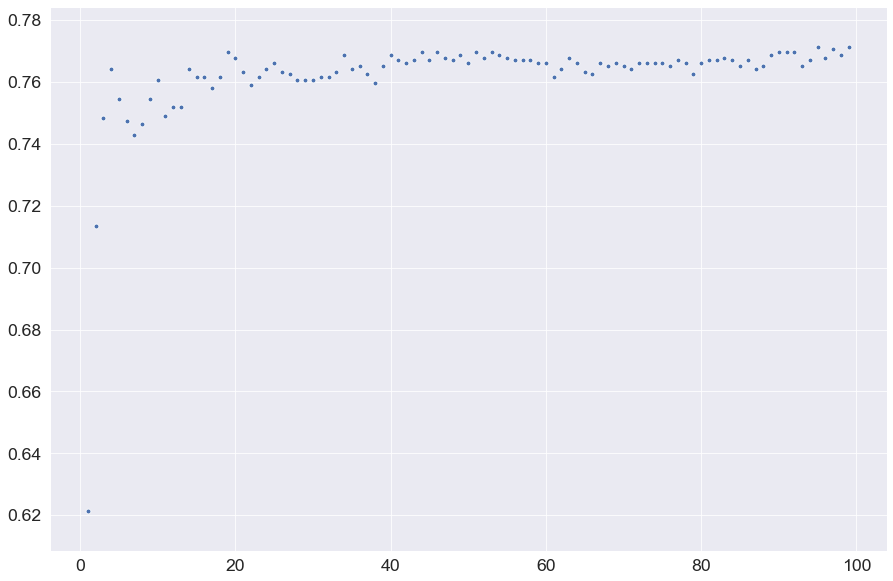

In [21]:
ntree=[]
r2=[]

for i in range(1,100):
    prueba=RandomForestClassifier(n_estimators=i,max_depth=5,min_samples_split=50,random_state=14)
    prueba.fit(x_trainB,y_trainB)
    
    ntree.append(i)
    r2.append(prueba.score(x_trainB,y_trainB))
    
sns.scatterplot(x=ntree,y=r2)

In [22]:
for x,i in enumerate(rf_model.feature_importances_):
    print(x_col[x],":   ",i)

months_loan_duration :    0.14348368504337727
amount :    0.07896911389266835
percent_of_income :    0.029424040086129765
years_at_residence :    0.008663291396754693
age :    0.07074542194844237
existing_loans_count :    0.004971531398430798
dependents :    0.00711856335403271
CB1_200 :    0.04429560286113654
CB0 :    0.09761736901524593
CBmayor200 :    0.002515617368470876
CBunknown :    0.25252530570262255
CHcritical :    0.03915005134185858
CHgood :    0.010740746538278782
CHperfect :    0.025684558780061092
CHpoor :    0.005222796440619759
CHverygood :    0.0054602516160668175
SB100_500 :    0.012831971515387149
SB500_1000 :    0.0065789363884917315
SBmenor100 :    0.047302379995721025
SBmayor1000 :    0.0035465542240015525
SBunkown :    0.013628212832049442
ED1_4 :    0.0020784989544795824
ED4_7 :    0.006677748833324734
EDmenor1 :    0.005287469370325595
EDmayor7 :    0.0029201192524862117
EDunemployed :    0.0022092083583933005
Hother :    0.02164871106349662
Hown :    0.013314

In [23]:
cm=confusion_matrix(y_true=y_trainB,y_pred=round(pd.Series(rf_model.predict(x_trainB)),0))

cm

array([[402, 161],
       [105, 452]])

In [24]:
precision_recall_fscore_support(y_true=y_trainB,y_pred=round(pd.Series(rf_model.predict(x_trainB)),0))

(array([0.79289941, 0.73735726]),
 array([0.71403197, 0.81149013]),
 array([0.75140187, 0.77264957]),
 array([563, 557]))

AUC: 0.807


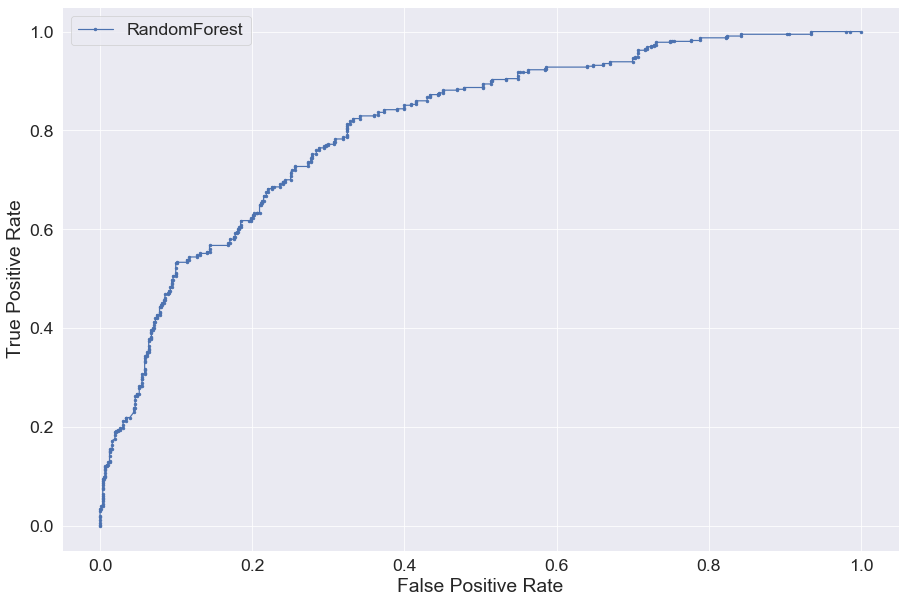

In [34]:
from sklearn.metrics import roc_auc_score, roc_curve
auc = roc_auc_score(y_trainB, rf_model.predict_proba(x_trainB)[:,1])
print('AUC: %.3f' % auc)

fpr, tpr, _ = roc_curve(y_trainB,rf_model.predict_proba(x_trainB)[:,1])
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.', label='RandomForest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [26]:
cm=confusion_matrix(y_true=y_test,y_pred=round(pd.Series(rf_model.predict(x_test)),0))

cm

array([[92, 43],
       [13, 52]])

In [28]:
precision_recall_fscore_support(y_true=y_testB,y_pred=round(pd.Series(rf_model.predict(x_testB)),0))

(array([0.71311475, 0.6835443 ]),
 array([0.6350365 , 0.75524476]),
 array([0.67181467, 0.71760797]),
 array([137, 143]))

AUC: 0.747


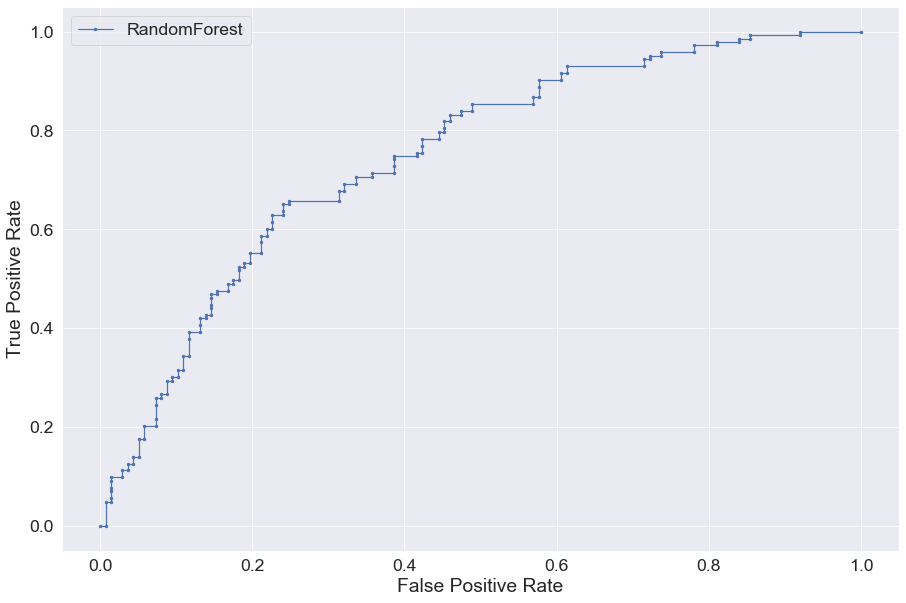

In [35]:
auc = roc_auc_score(y_testB, rf_model.predict_proba(x_testB)[:,1])
print('AUC: %.3f' % auc)

fpr, tpr, _ = roc_curve(y_testB,rf_model.predict_proba(x_testB)[:,1])
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.', label='RandomForest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()